In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [24]:
path= r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Practice\Fashion MNIST\MNIST Fashion dataset\fashion-mnist_train.csv'
fashion= pd.read_csv(path)
fashion
X_old= pd.DataFrame(fashion)
y= X_old.pop('label')
X= X_old/255
y= pd.get_dummies(y)
tf.reshape(X, [-1,28,28,1])
X_train, X_val, y_train, y_val= train_test_split(X,y,
                                                 train_size= 0.8,
                                                 test_size= 0.2
                                                 )
tf.shape(X_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([48000,   784])>

In [32]:
model= keras.Sequential([
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, input_shape=[784], activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10)

])

model.compile(optimizer='adam', loss= 'mae', metrics= 'accuracy')

In [33]:
early_stopping= EarlyStopping(
    min_delta= 0.001,
    patience= 20,
    restore_best_weights= True
)

In [29]:
history= model.fit(
    X_train, y_train,
    validation_data= (X_val, y_val),
    epochs= 500,
    batch_size=64,
    callbacks= [early_stopping],
    verbose= 0
)

In [30]:
preds= model.predict(X_val)
mae(y_val, preds)

375/375 [==============================] - 2s 4ms/step


0.036876757

Minimum validation loss: 0.036535006016492844


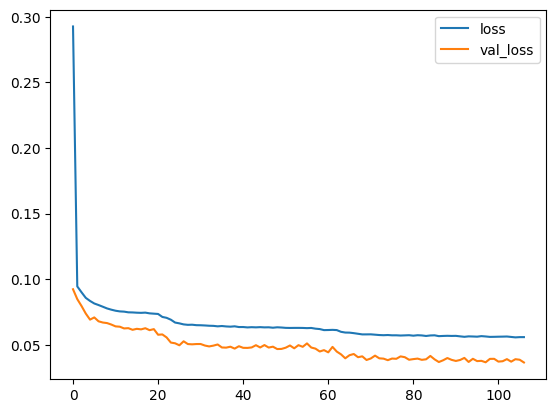

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [13]:
# X_train.reindex(inplace= True)

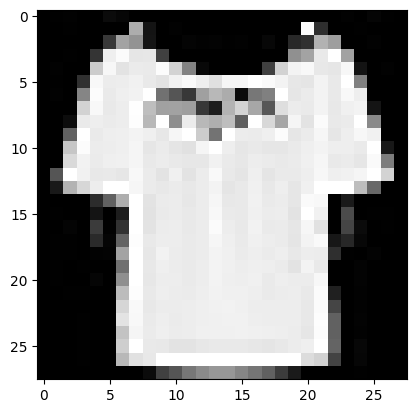

In [31]:
import matplotlib.pyplot as plt

view = tf.reshape(X_old,[-1,28, 28,1])
plt.gray()
plt.imshow(view[90])